In [21]:
# ! pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 653.6 kB/s eta 0:00:15
     -- ------------------------------------- 0.6/9.2 MB 5.5 MB/s eta 0:00:02
     ------- -------------------------------- 1.7/9.2 MB 12.2 MB/s eta 0:00:01
     -------------- ------------------------- 3.4/9.2 MB 18.3 MB/s eta 0:00:01
     ----------------------- ---------------- 5.4/9.2 MB 21.4 MB/s eta 0:00:01
     ------------------------------ --------- 7.0/9.2 MB 23.5 MB/s eta 0:00:01
     -------------------------------------- - 8.9/9.2 MB 26.0 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 24.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     ------------------------------------- 233.8/233.8 kB 14.0 MB/s eta 0:00:00


In [1]:
import streamlit as st
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sb
import os, math, re, time, requests

In [2]:
df = pd.read_csv("data_daily.csv", header=0, names=['Date', 'Receipt_Count'])
df_copy = df.copy()
df.head()

,Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [3]:
# df.info()
df_copy.info() # only working with the copy df rather than the original one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df_copy.isnull().sum()

Receipt_Count    0
Year             0
Month            0
Day              0
dtype: int64

In [4]:
df_copy.shape

(365, 2)

In [5]:
df_copy.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [17]:
# outliers detection if any
from scipy.stats import zscore

z_scores = zscore(df_copy.Receipt_Count)
z_scores.describe()

count    3.650000e+02
mean     7.786770e-17
std      1.001373e+00
min     -2.216763e+00
25%     -8.754767e-01
50%     -3.497984e-02
75%      8.328508e-01
max      2.448724e+00
Name: Receipt_Count, dtype: float64

In [28]:
df_copy["Date"] = pd.to_datetime(df_copy["Date"])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Receipt_Count  365 non-null    int64         
 1   Year           365 non-null    object        
 2   Month          365 non-null    object        
 3   Day            365 non-null    object        
 4   Date           365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 14.4+ KB


In [32]:
df_tsa = df_copy[["Date", "Receipt_Count"]]
df_tsa.set_index("Date", drop=True, inplace=True)
df_tsa.head()

,Receipt_Count
Date,
2021-01-01,7564766
2021-01-02,7455524
2021-01-03,7095414
2021-01-04,7666163
2021-01-05,7771289


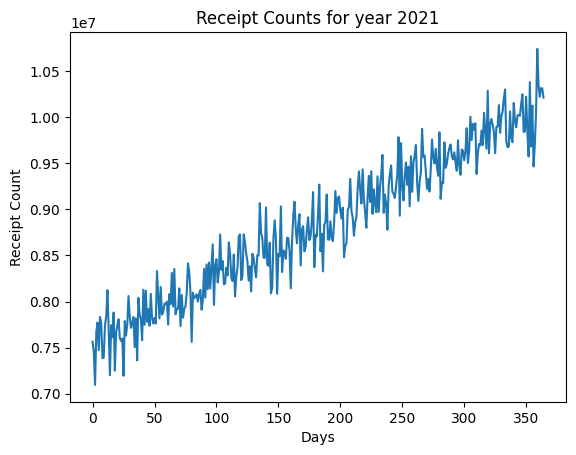

In [6]:
plt.plot(df_copy.index, df_copy.Receipt_Count)
plt.ylabel("Receipt Count")
plt.xlabel("Days")
plt.title("Receipt Counts for year 2021")
plt.show()

In [8]:
# splitting Date into Year, month, and day
df_copy[['Year', "Month", "Day"]] = df_copy["Date"].str.split('-', expand=True)
df_copy.drop(columns=['Date'], errors = 'ignore', inplace=True)
# df["Month"] = df["Date"].split('-')[1].int()
# df["Day"] = df["Date"].split('-')[2].int()
df_copy.head()

,Receipt_Count,Year,Month,Day
0,7564766,2021,01,01
1,7455524,2021,01,02
2,7095414,2021,01,03
3,7666163,2021,01,04
4,7771289,2021,01,05


In [9]:
# pivoting the receipt count based month

# df_copy.groupby(by = ["Month"], group_keys=True).get_group('12')
table_byMonth = pd.pivot_table(df_copy, values=["Receipt_Count"], index=["Month"], aggfunc='sum')
table_byMonth

,Receipt_Count
Month,
01,236736687
02,220033460
03,248608625
04,250644830
05,263151748
06,260656840
07,274776003
08,283943231
09,281146154


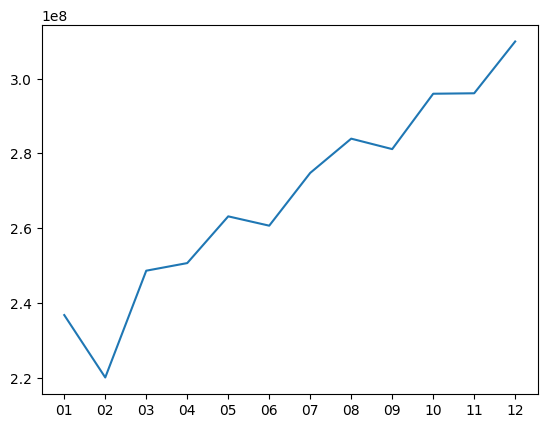

In [10]:
plt.plot(table_byMonth.index, table_byMonth.Receipt_Count)
plt.show()

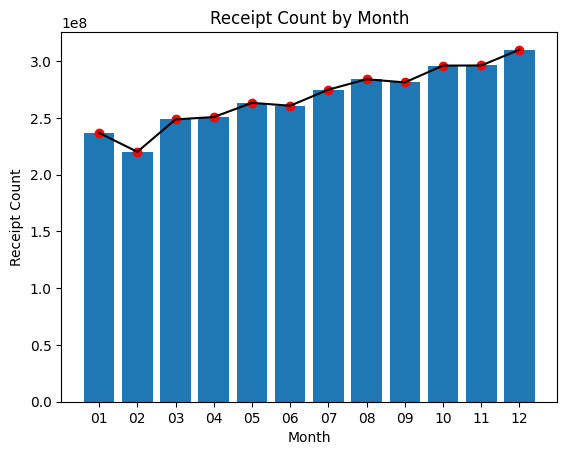

In [ ]:
plt.bar(table_byMonth.index, table_byMonth.Receipt_Count)
plt.plot(table_byMonth.index, table_byMonth.Receipt_Count, 'ro')
plt.plot(table_byMonth.index, table_byMonth.Receipt_Count, color = 'black', linewidth = 1.5)
plt.xlabel('Month')
plt.ylabel('Receipt Count')
plt.title('Receipt Count by Month')
plt.show()

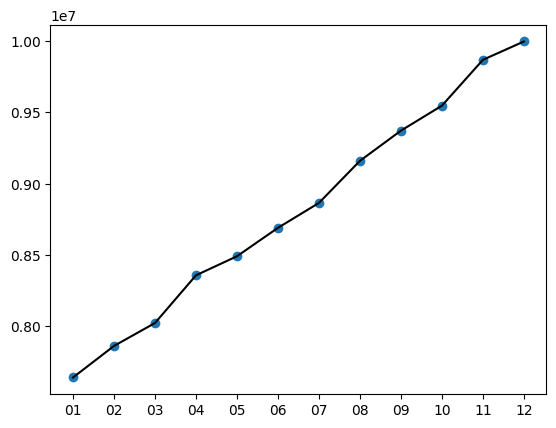

Monthly average number of receipts: 

       Receipt_Count
Month               
01      7.636667e+06
02      7.858338e+06
03      8.019633e+06
04      8.354828e+06
05      8.488766e+06
06      8.688561e+06
07      8.863742e+06
08      9.159459e+06
09      9.371538e+06
10      9.547264e+06
11      9.869505e+06
12      9.998345e+06


In [20]:
table_byMonth_avg = pd.pivot_table(df_copy, values=["Receipt_Count"], index=["Month"], aggfunc='mean')
plt.plot(table_byMonth_avg.index, table_byMonth_avg.Receipt_Count, 'o')
plt.plot(table_byMonth_avg.index, table_byMonth_avg.Receipt_Count, color = 'black', linewidth = 1.5)
plt.show()
print("Monthly average number of receipts: \n")
print(table_byMonth_avg)

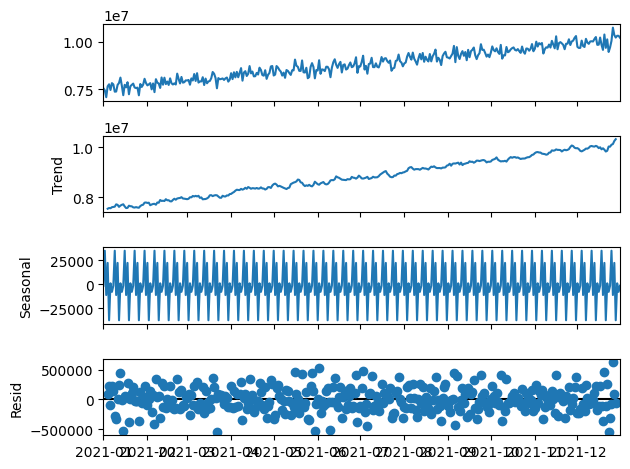

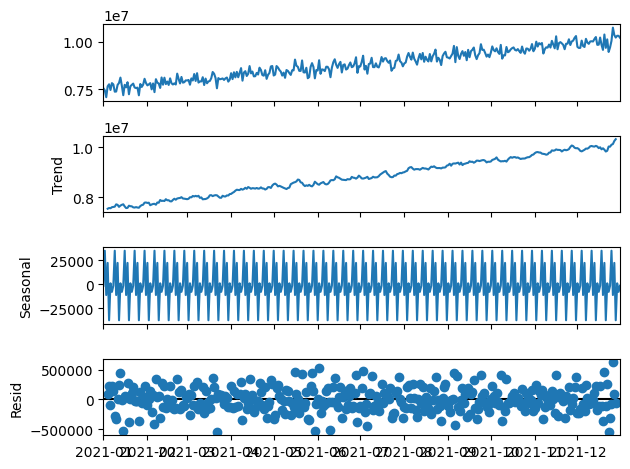

In [37]:
# Time Series Decomposition

# 1. Seasonality - recurring movement that is present in your time series variable
# 2. Trend - long-term upward or downward pattern
# 3. Noise - part of the variability in a time series that can neither be explained by seasonality nor by a trend

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_tsa)
result.plot()

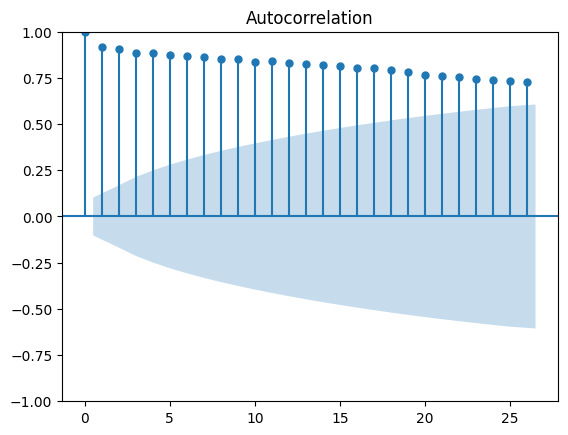

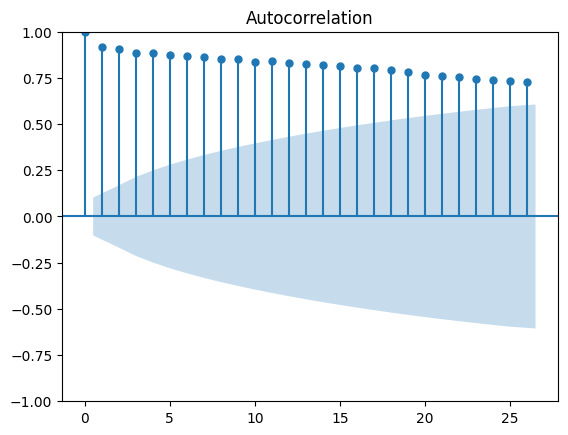

In [41]:
"""
Autocorrelation: correlation between a time series’ current value with past values
Types:
1. Postive autocorrelation: a high value now is likely to yield a high value in the future and vice versa.
2. Negative autocorrelation: a high value today implies a low value tomorrow and a low-value today implies a high-value tomorrow.
"""

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_tsa)


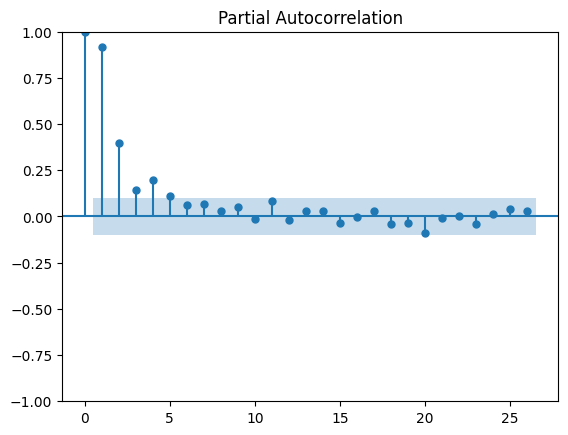

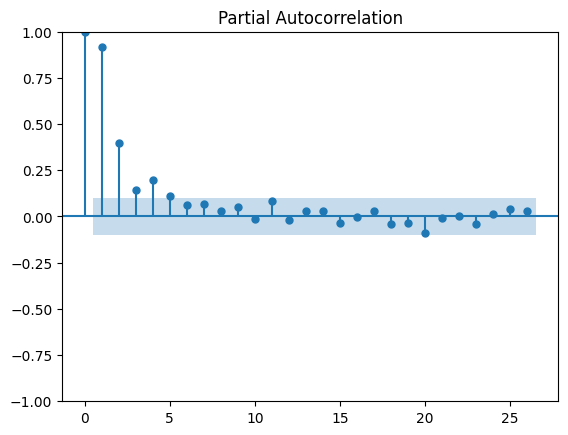

In [42]:
plot_pacf(df_tsa)

In [46]:
"""
Stationarity: A stationary time series is a time series that has no trend.

* can detect non-stationarity using the Dickey-Fuller Test and you can remove non-stationarity using differencing.

- The null hypothesis of the ADF test is that a unit root is present in the time series. 
- The alternative hypothesis is that the data is stationary.

If this p-value is smaller than 0.05 you can reject the null hypothesis (reject non-stationarity),
and accept the alternative hypothesis (stationarity).
"""
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_tsa.Receipt_Count.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: 0.175044165720054
ADF p-values: 0.9708266454651424
ADF number of lags used: 17
ADF number of observations: 347
ADF critical values: {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}
ADF best information criterion: 9546.283513580593


The p-value in the ADF test is greater than the p-value, so we accept the null hypothesis that a unit root is present in the time series

<Axes: xlabel='Date'>

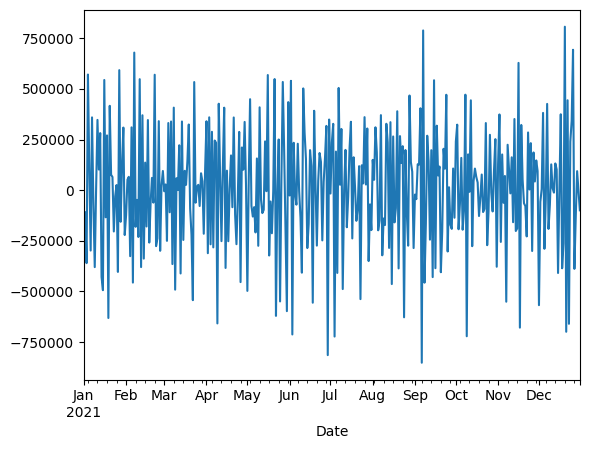

In [47]:
"""
Differencing: Done to remove the trend in time series
"""
prev_receipt_count = df_tsa.Receipt_Count.shift()
differenced_count = df_tsa.Receipt_Count - prev_receipt_count
differenced_count.plot()

In [49]:
# Redoing the ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_count.dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -8.889819175651194
ADF p-values: 1.2512872154223906e-14
ADF number of lags used: 17
ADF number of observations: 346
ADF critical values: {'1%': -3.4493918438232525, '5%': -2.8699298018856574, '10%': -2.5712397066390458}
ADF best information criterion: 9511.626967070977


p-value is smaller than 0.05 so we reject the null hypothesis (reject non-stationarity), and accept the alternative hypothesis (stationarity)

In [ ]:
# Modeling

